In [1]:
import torch
from torch import nn, Tensor

In [2]:
class MyLiner(nn.Module) :
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weights = nn.Parameter(
            torch.randn(in_features, out_features))
        self.bias = nn.Parameter(torch.randn(out_features))
    
    def forward(self, x : Tensor):
        return x @ self.weights + self.bias

In [3]:
layer = MyLiner(7,3)

In [4]:
layer.weights

Parameter containing:
tensor([[-0.6018,  0.2160,  0.6083],
        [ 0.6945,  0.4054,  0.3403],
        [ 1.5058,  1.1616, -0.3930],
        [ 1.5817,  0.8377,  1.3429],
        [-0.6268, -0.9063,  0.4403],
        [-0.9582,  0.6434, -0.7499],
        [ 0.1912, -0.7620, -0.4488]], requires_grad=True)

In [5]:
layer.bias

Parameter containing:
tensor([ 0.3014, -0.6978, -1.0641], requires_grad=True)

In [6]:
x = torch.randn(5,7)
x

tensor([[-0.4201,  1.9211, -0.5575,  1.7297, -1.8585, -0.3457, -0.0887],
        [ 1.2280, -0.0408,  0.0900,  2.5290, -0.6197,  0.9817, -1.7767],
        [ 0.2992,  2.4872,  0.7001,  1.6615, -0.2881, -0.7841,  0.2923],
        [-0.6494,  0.2398, -0.0102,  0.1884,  0.1470, -0.2857, -2.0326],
        [-1.3794,  0.2734, -0.9047,  0.7921, -1.6128, -1.2318,  0.1656]])

In [7]:
layer(x) # 순전파

tensor([[ 5.2639,  2.3212,  1.3566],
        [ 2.7778,  4.3209,  2.8180],
        [ 6.5186,  2.1140,  2.2502],
        [ 0.9346,  0.6370,  0.0706],
        [ 3.4350, -0.7292, -0.2517]], grad_fn=<AddBackward0>)

In [8]:
for value in layer.parameters():
    print(value) # gradient의 대상이 되는 weight & bias 

Parameter containing:
tensor([[-0.6018,  0.2160,  0.6083],
        [ 0.6945,  0.4054,  0.3403],
        [ 1.5058,  1.1616, -0.3930],
        [ 1.5817,  0.8377,  1.3429],
        [-0.6268, -0.9063,  0.4403],
        [-0.9582,  0.6434, -0.7499],
        [ 0.1912, -0.7620, -0.4488]], requires_grad=True)
Parameter containing:
tensor([ 0.3014, -0.6978, -1.0641], requires_grad=True)


In [9]:
from torch.autograd import Variable

In [10]:
class LinearRegression(nn.Module) :
    def __init__(self, inputSize, outputSize):
        super().__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [11]:
inputDim = 1
outputDim = 1
learningRate = 0.01
epochs = 100

In [12]:
import numpy as np

x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1,1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1,1)

In [13]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [14]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [15]:
model = LinearRegression(inputDim, outputDim)

In [16]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [17]:
for epoch in range(epochs):
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    print(loss)
    loss.backward()
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(269.1558, grad_fn=<MseLossBackward0>)
epoch 0, loss 269.15576171875
tensor(22.1461, grad_fn=<MseLossBackward0>)
epoch 1, loss 22.146066665649414
tensor(1.9961, grad_fn=<MseLossBackward0>)
epoch 2, loss 1.996130347251892
tensor(0.3504, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.3504437208175659
tensor(0.2141, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.2141149938106537
tensor(0.2009, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.20092326402664185
tensor(0.1978, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.19779859483242035
tensor(0.1955, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.1955181062221527
tensor(0.1933, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.19332896173000336
tensor(0.1912, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.19116969406604767
tensor(0.1890, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.18903464078903198
tensor(0.1869, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.18692398071289062
tensor(0.1848, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.1848364770412445
tens

In [18]:
with torch.no_grad():
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 0.50931203]
 [ 2.5799756 ]
 [ 4.650639  ]
 [ 6.7213025 ]
 [ 8.7919655 ]
 [10.862629  ]
 [12.933292  ]
 [15.003956  ]
 [17.07462   ]
 [19.145283  ]
 [21.215946  ]]


## 

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# data download
DATA_PATH = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
SAVE_PATH = '/content/drive/MyDrive/boostcamp/code_notes/pytorch/notebook/'
import urllib
import os
import shutil
from zipfile import ZipFile

urllib.request.urlretrieve(DATA_PATH, SAVE_PATH+'data/hymenoptera_data.zip')

with ZipFile(SAVE_PATH+'data/hymenoptera_data.zip', 'r') as zipObj :
    zipObj.extractall('data/')

data_dir = 'data/hymenoptera_data'

In [21]:
class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size
        
    def __call__(self, img):
        result = torch.reshape(img, self.new_size)
        return result

In [22]:
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt

In [23]:
# transformation
data_transforms = {
    'train' : transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flatten
    ]),
    
    'val' : transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flatten
    ])
}

# load dataset
image_datasets = {x:datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}

train_dataset = torch.utils.data.DataLoader(image_datasets['train'],
                                            batch_size=len(image_datasets['train']),
                                            shuffle=True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                            batch_size=len(image_datasets['val']),
                                            shuffle=True)

Dimension of images :  torch.Size([244, 150528]) 
 Dimension of labels :  torch.Size([244])


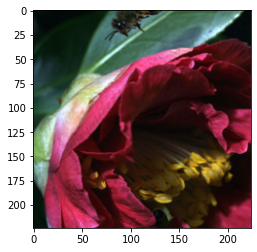

In [24]:
x,y = next(iter(train_dataset))
dim = x.shape[1]
print("Dimension of images : ", x.shape, "\n",
      "Dimension of labels : ", y.shape)

plt.imshow(x[160].reshape(1,3,224,224).squeeze().T.numpy())

In [25]:
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super().__init__()
        self.w = torch.zeros(dim,1,dtype=torch.float)
        self.b = torch.scalar_tensor(0)
        self.grads = {"dw" : torch.zeros(dim, 1, dtype=torch.float),
                      "db" : torch.scalar_tensor(0)}
        self.lr = lr
        
    def forward(self,x):
        z = torch.mm(self.w.T, x) + self.b
        a = self.sigmoid(z)
        return a
    
    def sigmoid(self, z):
        return 1/(1+torch.exp(-z))
    
    def backward(self, x, yhat, y):
        self.grads["dw"] = (1/x.shape[1]) * torch.mm(x,(yhat-y).T) # grad sigmoid
        self.grads["db"] = (1/x.shape[1]) * torch.sum(yhat-y) # grad sigmoid
    
    def optimize(self):
        self.w = self.w - self.lr * self.grads["dw"]
        self.b = self.b - self.lr * self.grads["db"]

In [26]:
def loss(yhat, y):
    m = y.size()[1]
    return -(1/m) * torch.sum(y*torch.log(yhat) + (1-y)*torch.log(1-yhat))

def predict(yhat, y):
    y_prediction = torch.zeros(1, y.size()[1])
    for i in range(yhat.size()[1]):
        if yhat[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else :
            y_prediction[0, i] = 1
    
    return 100 - torch.mean(torch.abs(y_prediction - y)) * 100

In [27]:
# model pretesting
x,y = next(iter(train_dataset))
print('x shape : ', x.shape)
print('y shape : ', y.shape)

x_flatten = x.T
y = y.unsqueeze(0)
print('y unsqueezed : ', y.shape)

dim = x_flatten.shape[0]
print('num of dim : ', dim)

# model instance
model = LR(dim)
yhat = model.forward(x_flatten)

# loss
cost = loss(yhat, y)
prediction = predict(yhat, y)
print("Cost : ", cost)
print("Accuracy : ", prediction)

# backprop
model.backward(x_flatten, yhat, y)
model.optimize()

x shape :  torch.Size([244, 150528])
y shape :  torch.Size([244])
y unsqueezed :  torch.Size([1, 244])
num of dim :  150528
Cost :  tensor(0.6931)
Accuracy :  tensor(50.4098)


In [31]:
# iter
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

def transform_data(x, y):
    x_flatten = x.T
    y = y.unsqueeze(0)
    return x_flatten, y

for i in range(num_iterations):
    x, y = next(iter(train_dataset))
    test_x, test_y = next(iter(test_dataset))
    x, y = transform_data(x,y)
    test_x, test_y = transform_data(test_x, test_y)
    
    #forward
    yhat = lrmodel.forward(x.to(device))
    cost = loss(yhat.data.cpu(), y)
    train_pred = predict(yhat,y)

    #backward
    lrmodel.backward(x.to(device),
                     yhat.to(device),
                     y.to(device))
    lrmodel.optimize()
    
    #test(only forward)
    yhat_test = lrmodel.forward(test_x.to(device))
    test_pred = predict(yhat_test, test_y)

    if i % 10 == 0 :
      costs.append(cost)
      print('Cost after iteration {} : {} | Train Acc : {} | Test Acc : {}'.format(i,
                                                                                   cost,
                                                                                   train_pred,
                                                                                   test_pred))

RuntimeError: ignored